# Homework 4

#### Worked with: Emma, Vitoria, Marius, Marcel

### Problem 2: Totally Rocking out in Pierce Hall

#### Problem 2a:

In [23]:
# Problem 2
import numpy as np
import matplotlib.pyplot as plt
#plt.spy(file_data)
pierce = np.loadtxt('am205_hw4_files/pierce.txt')

# from S
def p1(p0, t, w):
    return p0 * np.sin(w*t) #only where the speaker is

#this is the today matrix, the first time
def create_p1(p0, t, w): #this is pn with dimensions[j][k]  where n =1, because this is the "first today"
    p_curr = np.zeros((100,200)) # What should this be initialized to?
    for j in range(0,100): # rows
        for k in range(0,200): # columns
            if (j >= 57) and (j <=60) and (k >= 15) and (k <=18): #where S is, where the loud speaker is
                p_curr[j][k] = p1(p0, t, w)
    return p_curr #today, which will change every day
    
#57 ≤ j ≤60,15 ≤ k ≤ 18

def pierce_discrete(t, track_locations = False):

    ts = []
    person1 = []
    person2 = []
    person3 = []

    h = 36.6 # cm 
    c = 3.43 * 10**4 #cm s-1 centimeters/second
    w = 100 * np.pi # s-1 centimenters/second
    p0 = 10 # Pa = 1 N/m^2
    delta_t = h/(2*c) # timestep

    #Initialize p_old and p_curr for n = 1
    p_old = np.zeros((100,200))
    p_curr = create_p1(p0, t, w)
    p_next = np.zeros((100,200)) 
    
    N = t/delta_t
    count = 0
    t = 0
    for n in range(1, int(N)+1):
        # Need to do a step function for p_curr
        const = (c**2*delta_t**2)/h**2
        count = count +1

        # creating our initial matrix
        for j in range(0,99): # rows
        
            for k in range(0,199): # columns
            
                # if I am in the zone of the speaker:
                if (j >= 57) and (j <=60) and (k >= 15) and (k <=18):
                    p_next[j][k] = p1(p0, delta_t*count, w)
                    
                else:
                    # original discretization
                    p_next[j][k] = 2*p_curr[j][k] - p_old[j][k] + (const)*(p_curr[j+1][k] \
                    + p_curr[j][k+1]-4*p_curr[j][k]+p_curr[j-1][k] + p_curr[j][k-1]) # general case

                    if pierce[j][k] == 1: # hits a wall immediately
                        p_next[j][k] = 0 

                    if pierce[j][k] == 0: # need to update p_next & check all of 5 stencils
                    # we are doing if everywhere instead of elif because
                    # we want to check all of the cases regardless of whether the preious one was the case 
                        if pierce[j-1][k] == 1: #2.1
                            p_next[j][k] -= const*(p_curr[j-1][k] - p_curr[j][k])
                        
                        if pierce[j+1][k] == 1: #2.2
                            p_next[j][k] -= const*(p_curr[j+1][k] - p_curr[j][k])
                        
                        if pierce[j][k+1] == 1: #2.3
                            p_next[j][k] -= const*(p_curr[j][k+1] - p_curr[j][k])
                        
                        if pierce[j][k-1] == 1: #2.4
                            p_next[j][k] -= const*(p_curr[j][k-1] - p_curr[j][k])

        # need to update matrices for next n
        p_old = p_curr.copy()
        p_curr = p_next.copy()
        t += delta_t

        if track_locations == True:
            person1.append(p_curr[35][73])
            person2.append(p_curr[61][109])
            person3.append(p_curr[91][188])
            ts.append(t)

    if track_locations == False:
        return p_next

    elif track_locations == True:
        return p_next, person1, person2, person3, ts

#### Problem 2b:

In [25]:
import numpy as np
import custom_plot as cplt
from math import sin


h = 36.6 # cm 
c = 3.43 * 10**4 #cm s-1 centimeters/second
w = 100 * np.pi # s-1 centimenters/second
p0 = 10 # Pa = 1 N/m^2
delta_t = h/(2*c) # timestep

# t = 0.015 s
w_ = pierce_discrete(0.015)

# Load in the wall matrix
q_ = np.loadtxt("am205_hw4_files/pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("015_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("015_2.png",w_, q_,-1.1,1.1,3)


##### Plots for t = 0.015 s
Plot 1: \
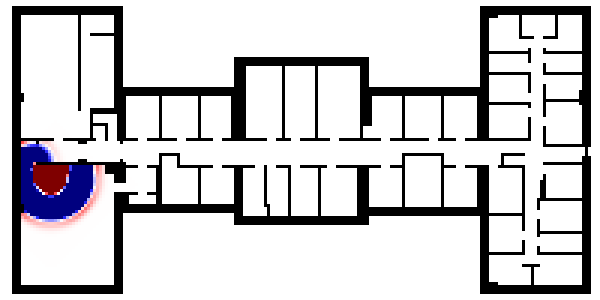

Plo2 2: \
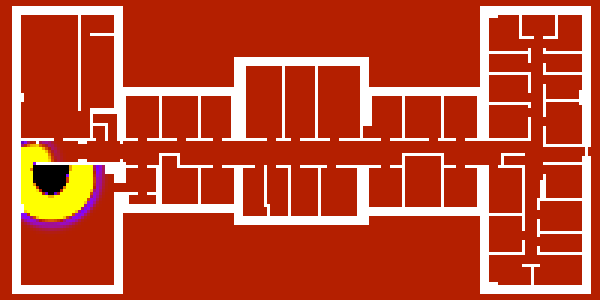

In [26]:
# t = 0.105s
w_ = pierce_discrete(0.105)

# Load in the wall matrix
q_ = np.loadtxt("am205_hw4_files/pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("105_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("105_2.png",w_, q_,-1.1,1.1,3)

##### Plots for t = 0.105 s
Plot 1: \
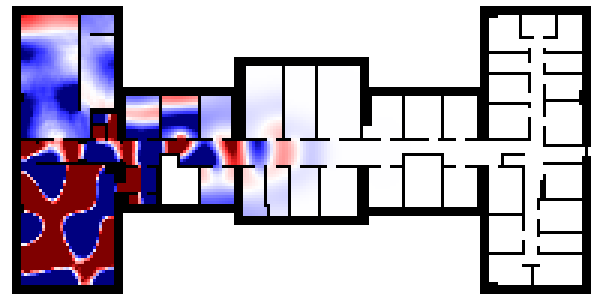


Plot 2: \
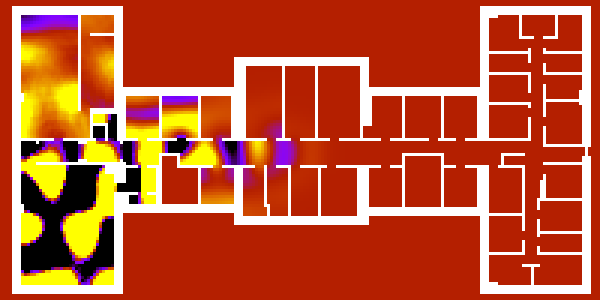

In [27]:
# t = 0.505s
w_ = pierce_discrete(0.505)

# Load in the wall matrix
q_ = np.loadtxt("am205_hw4_files/pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("505_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("505_2.png",w_, q_,-1.1,1.1,3)

##### Plots for t = 0.505 s
Plot 1: \
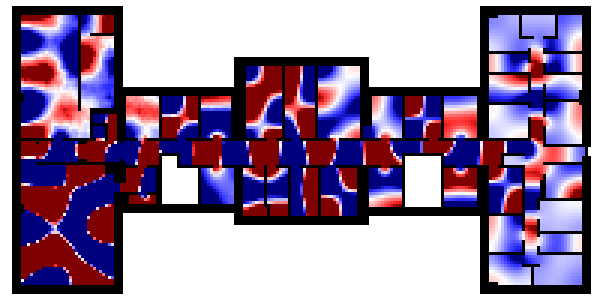

Plot 2: \
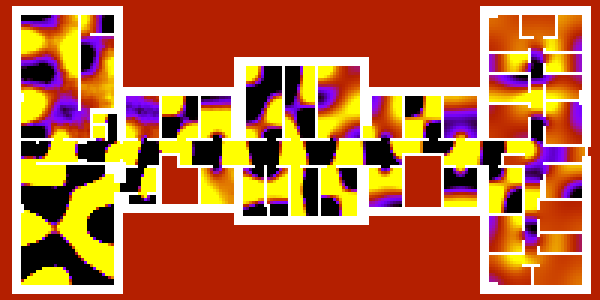

In [28]:
# t = 1.005
w_ = pierce_discrete(1.005)

# Load in the wall matrix
q_ = np.loadtxt("am205_hw4_files/pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("1_005_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("1_005_2.png",w_, q_,-1.1,1.1,3)

##### Plots for t = 1.005 s
Plot 1: \
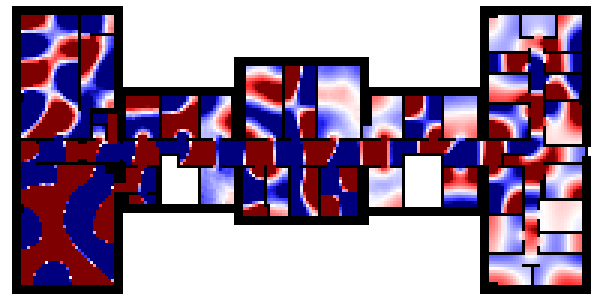

Plot 2: \
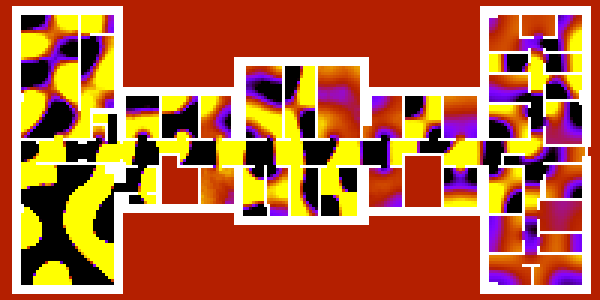

#### Problem 2c: 

In [29]:
w, person1, person2, person3, ts = pierce_discrete(1, track_locations = True)

In [45]:
person1_ind = None
person2_ind = None
person3_ind = None

for i in range(len(np.linspace(0.001, 1, 1000))):
    # need to know the first time it hits them
    if (abs(person1[i]) > 10**(-3)) and (person1_ind == None): 
        person1_ind = i

    if abs(person2[i]) > 10**(-3) and (person2_ind == None):
        person2_ind = i

    if abs(person3[i]) > 10**(-3) and (person3_ind == None):
        person3_ind = i

In [46]:
h = 36.6 # cm 
c = 3.43 * 10**4 #cm s-1 centimeters/second
delta_t = h/(2*c) # timestep

print(f"Here is the time at which the sound hits person at (35,73): {ts[person1_ind]:.4f} s")
print(f"Here is the time at which the sound hits person at (61,109): {ts[person2_ind]:.4f} s")
print(f"Here is the time at which the sound hits person at (91,188): {ts[person3_ind]:.4f} s")

Here is the time at which the sound hits person at (35,73): 0.0736
Here is the time at which the sound hits person at (61,109): 0.1088
Here is the time at which the sound hits person at (91,188): 0.2310


**Discuss whether your results are reasonable, given the locations of the people in relation to the loudspeaker.**
The times look reasonable considering the plots we made in 2b. You can see that at 0.105 seconds it would definitely reach the person at (35,73) as well as for 0.505 seconds it would hit the people at (61,109) and (91,188). You can also compare the earlier plots and know that it will not hit the first person before 0.015, which is true, and the other people it will not hit them before 0.105 seconds. It also makes sense that the sound hits the closest person first and the furthest person last.

#### Problem 2d

Text(0, 0.5, 'p(t)')

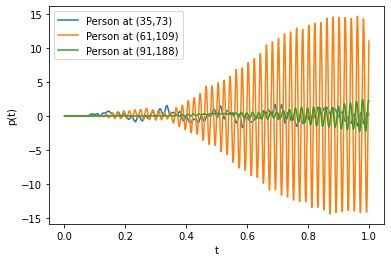

In [49]:
plt.plot(ts, person1, label = 'Person at (35,73)')
plt.plot(ts, person2,label = 'Person at (61,109)')
plt.plot(ts, person3, label = 'Person at (91,188)')
plt.legend()

plt.xlabel('t')
plt.ylabel('p(t)')

**Which person is most likely to be disturbed by the loudspeaker?** \
It looks like person at (61,109) will be the most disturbed by the loudspeaker. This could be do to how the acoustics bounce off within the path to that person. There could be less walls or more that affect the frequency and amplitudes of the sound waves to the different locations. The person at (61,109) could just be at the most optimal location from the speaker.

### Problem 3: 

#### Problem 3a: 


Jacobian = $\dfrac{\partial{F_i(U)}}{\partial{U_i}}$ \
$F_i(U) = \dfrac{U_{i+1}-2U_i + U_{i-1}}{h^2} - e^{U_i}$ for i = 1,2,3...n

We can do the partials of for i = 3,4 and start to see a pattern that forms. \
$i = 3: F_3 = \dfrac{U_4-2U_3 + U_2}{h^2} - e^{U_3}$

$\dfrac{\partial{F_3(U)}}{\partial{U_1}} = 0$

$\dfrac{\partial{F_3(U)}}{\partial{U_2}} = \dfrac{1}{h^2}$

$\dfrac{\partial{F_3(U)}}{\partial{U_3}} = \dfrac{-2}{h^2} - e^{U_3}$

$\dfrac{\partial{F_3(U)}}{\partial{U_4}} = \dfrac{1}{h^2}$

$\dfrac{\partial{F_3(U)}}{\partial{U_5}} = 0$

$i = 4: F_4 = \dfrac{U_5-2U_4 + U_3}{h^2} - e^{U_4}$

$\dfrac{\partial{F_4(U)}}{\partial{U_2}} = 0$

$\dfrac{\partial{F_4(U)}}{\partial{U_3}} = \dfrac{1}{h^2}$

$\dfrac{\partial{F_4(U)}}{\partial{U_4}} = \dfrac{-2}{h^2} - e^{U_4}$

$\dfrac{\partial{F_4(U)}}{\partial{U_5}} = \dfrac{1}{h^2}$

$\dfrac{\partial{F_4(U)}}{\partial{U_6}} = 0$

You can see the pattern that occurs based off of these two examples, where everything before i-2 is zero and everything after i+2 is also zero. This means we only get values when we do partials for values of i-1, i, and i +1. You can see that Jacobian matrix then becomes a matrix that has three diagonals (i-1 = j-1, i = j, i+1 = j+1) corresponding to each value  $[\dfrac{1}{h^2},\dfrac{-2}{h^2} - e^{U_i}, \dfrac{1}{h^2}]$. The plot below shows how the matrix is filled in the three diagonals and then zeros everywhere else.


$$J_f = \begin{bmatrix} 
\dfrac{-2}{h^2} - e^{U_1}  & \dfrac{1}{h^2} & 0 & 0 & 0 & 0 & ... & 0  \\ 
\dfrac{1}{h^2} & \dfrac{-2}{h^2} - e^{U_2} & \dfrac{1}{h^2}  & 0 & 0 & 0 & ... & 0 \\
... \\ 
0 & 0  & 0 & 0  & ... & \dfrac{1}{h^2} & \dfrac{-2}{h^2} - e^{U_{n-3}} &  \dfrac{1}{h^2}\\ 
0 & 0  & 0 & 0  & ... & 0 & \dfrac{1}{h^2} &  \dfrac{-2}{h^2} - e^{U_{n-2}}\\ 
\end{bmatrix} $$

**Note** This matrix does not include the padding.

In [33]:
import numpy as np

def sparsify(n): #creates the derivative
    f = np.zeros((n,n))
    h = 2/(n-1)
    #print(f)
    for i in range(0, n):
        for j in range(0,n):
            if i == j:  # middle diagonal
                f[i][j] = -2/(h**2) # do not have the e^U value because we don't have it
            if i+1 < n and i+1 == j+1:
                f[i][j+1] = 1/(h**2) # diagonal above
            if i-1 >= 0 and i-1 == j-1:
                f[i][j-1] = 1/(h**2) #diagonal below
    return f

Text(0, 0.5, 'columns j')

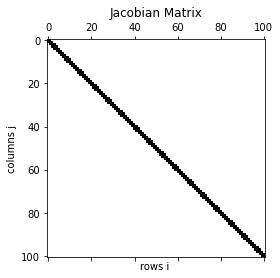

In [35]:
import matplotlib.pyplot as plt
jacobian = sparsify(101)
plt.spy(jacobian)
plt.title("Jacobian Matrix")
plt.xlabel("rows i ")
plt.ylabel("columns j")

#### Problem 3b:

In [36]:
#creates the derivative matrix
def jacobian(n, U): 
    jacob = np.zeros((n,n))
    h = 2/100
    #print(f)
    for i in range(0, n):
        for j in range(0,n):
            if i == j:  # middle diagonal
                jacob[i][j] = -2/(h**2) - np.exp(U[i])
            if i+1 < n and i+1 == j+1:
                jacob[i][j+1] = 1/(h**2) # diagonal above
            if i-1 >= 0 and i-1 == j-1:
                jacob[i][j-1] = 1/(h**2) # diagonal below
    return jacob

# creating function vector
def function(U):
    n = len(U)
    h = 2/100
    f = np.zeros((n,1))
    for i in range(len(U)):
        if i == 0:
            f[i] = (U[i+1] - 2*U[i])/h**2 - np.exp(U[i])
        elif i < len(U) - 1 and i > 0:
            f[i] = (U[i+1] - 2*U[i]+U[i-1])/h**2 - np.exp(U[i]) 
        else: #this is the case for i == n-1
            f[i] = (-2*U[i] + U[i-1])/h**2 - np.exp(U[i]) 
    return f

    
# iterates up to find the Kth solution for U that satisfies the tolerance
def my_newton_iteration(n):
    n = n-2 # for padding
    u_k0 = np.zeros((n,1)) # initial condition for U0
 
    tol = 1
    k_iteration = 0
    #need initial tolerance
    while tol > 10**(-10):
        jacob = jacobian(n, u_k0)
        fi = -1 * function(u_k0)
        delta_uk = np.linalg.solve(jacob, fi)
        
        # getting updated for the next iteration of jacobian & fi
        u_k1 = u_k0 + delta_uk
        tol = np.linalg.norm(delta_uk)/np.linalg.norm(u_k1)

        k_iteration += 1

        # now need to update the next value
        u_k0 = u_k1
    
    return u_k1, k_iteration


In [37]:
uk, count = my_newton_iteration(101)
U_padded = np.insert(uk, 0, 0)
U_padded = np.insert(U_padded, 100, 0)


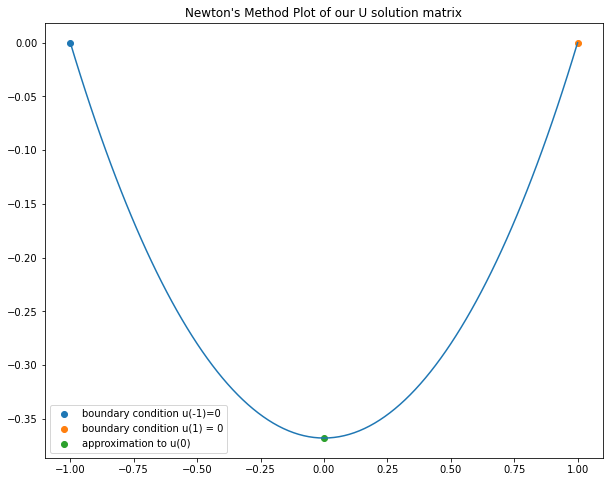

In [50]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-1, 1,101), U_padded)
plt.scatter(-1, 0, label = "boundary condition u(-1)=0")
plt.scatter(1, 0, label = "boundary condition u(1) = 0")
plt.scatter(0, uk[49], label = 'approximation to u(0)')
plt.title("Newton's Method Plot of our U solution matrix")
plt.legend()

In [44]:
print(f"The approximation of to u(0) = {U_padded[50]:.5f}, which is the middle value of our U solution")

The approximation of to u(0) = -0.36805 which is the middle value of our U solution
